In [1]:
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
import torch
import GenerativeAdversarialNetwork as GenerativeAdversarialNetwork

In [2]:
epochs = 1000
display_step = 500
batch_size = 128
crit_repeats = 5
learning_rate = 0.0002
beta_1 = 0.9
beta_2 = 0.999
lambda_ = 10
z_dim = 64
n_images = batch_size
size = (1, 28, 28)
numClasses = 10
device = 'cuda'
loss = 'BCE'

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])
dataloader = DataLoader(
    FashionMNIST('.', download = False, transform = transform),
    batch_size = batch_size,
    shuffle = True
)

In [ ]:
Generator_1 = GenerativeAdversarialNetwork.GAN([], epochs, display_step, batch_size, crit_repeats, learning_rate, beta_1, beta_2, lambda_, z_dim, size, numClasses, dataloader, loss, device)

In [10]:
torch.save(Generator_1, './Generator_1')

In [4]:
Generator_1 = torch.load('./Generator_1')

In [5]:
Generator_1.eval()

Generator(
  (gen): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(74, 256, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Sequential(
      (0): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2))
      (1): Tanh()
    )
  )
)

In [18]:
batch_size = 30
n_images = 30

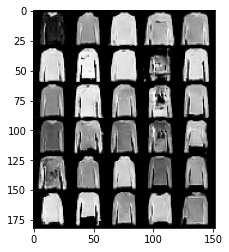

In [19]:
GenerativeAdversarialNetwork.generate_images(Generator_1, batch_size, z_dim, numClasses, n_images, size, [2], device)